### Table of Contents

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/lynnsey/Desktop/Bootcamp/Tasks/Immersion/Task 6/09-07-2023 Living Planet Index Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'birds_v8.csv'))

In [5]:
df.shape

(12919, 86)

In [6]:
df.head()

,id,scientific_name,class,order,family,genus,species,common_name,country,region,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Balearica_regulorum,Aves,Gruiformes,Gruidae,Balearica,regulorum,Grey-crowned crane,Uganda,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Acrocephalus_sechellensis,Aves,Passeriformes,Acrocephalidae,Acrocephalus,sechellensis,Seychelles warbler,Seychelles,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Copsychus_sechellarum,Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,Seychelles magpie-robin,Seychelles,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Copsychus_sechellarum,Aves,Passeriformes,Muscicapidae,Copsychus,sechellarum,Seychelles magpie-robin,Seychelles,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Falco_punctatus,Aves,Falconiformes,Falconidae,Falco,punctatus,Mauritius kestrel,Mauritius,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(columns = ['id', 'scientific_name', 'class', 'order', 'family', 'genus', 'species', 'common_name', 'country', 'region', 'system'])

In [8]:
# Repalce NaN with zero on all columns 

df = df.fillna(0)

### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/lynnsey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lynnsey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lynnsey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lynnsey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lynns

[-7994573661887159.0,
 -4194310936923967.5,
 -2001384778396479.0,
 -1315719915232345.0,
 -978600819992995.9,
 -816282194701463.8,
 -720598608640415.6,
 -619702270361723.8,
 -565724260621679.8]

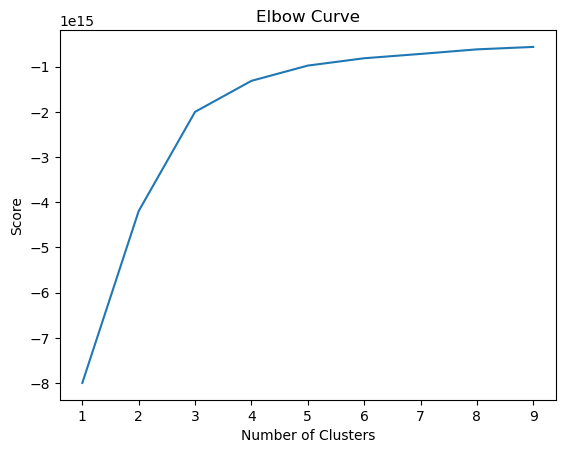

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Looking at the elbow curve, I should have 4 clusters.  At 4, we see it smooth out into a mostly straight line.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)


In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/lynnsey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

/Users/lynnsey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df.head()

,avg_1950_to_1974,avg_1975_to_1999,avg_2000_to_2020,avg_all_yrs,1950,1951,1952,1953,1954,1955,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,clusters
0,1962.0,7.0,11.0,8.333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,30.0,352.0,0.0,244.667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,30.0,27.0,0.0,27.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,29.0,0.0,29.071,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2.0,31.0,0.0,28.480,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
df['clusters'].value_counts()

0    12900
2       16
3        2
1        1
Name: clusters, dtype: int64

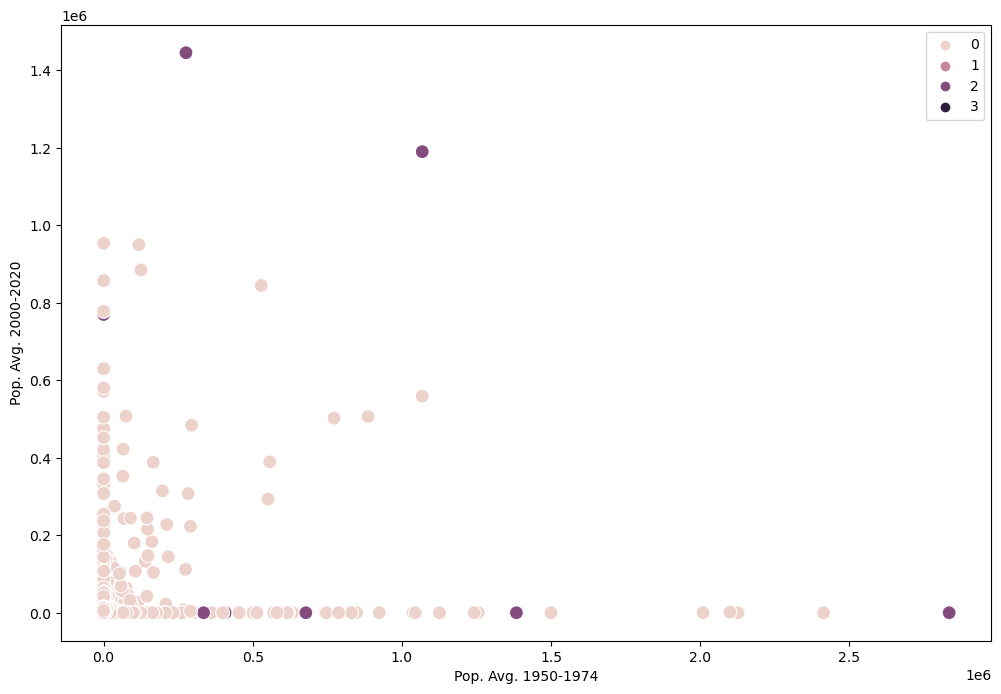

In [23]:
# Plot the clusters for the Pop. Avg. 1950-1974 and Pop. Avg. 2000-2020 variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['avg_1950_to_1974'], y=df['avg_2000_to_2020'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pop. Avg. 1950-1974') # Label x-axis.
plt.ylabel('Pop. Avg. 2000-2020') # Label y-axis.
plt.show()

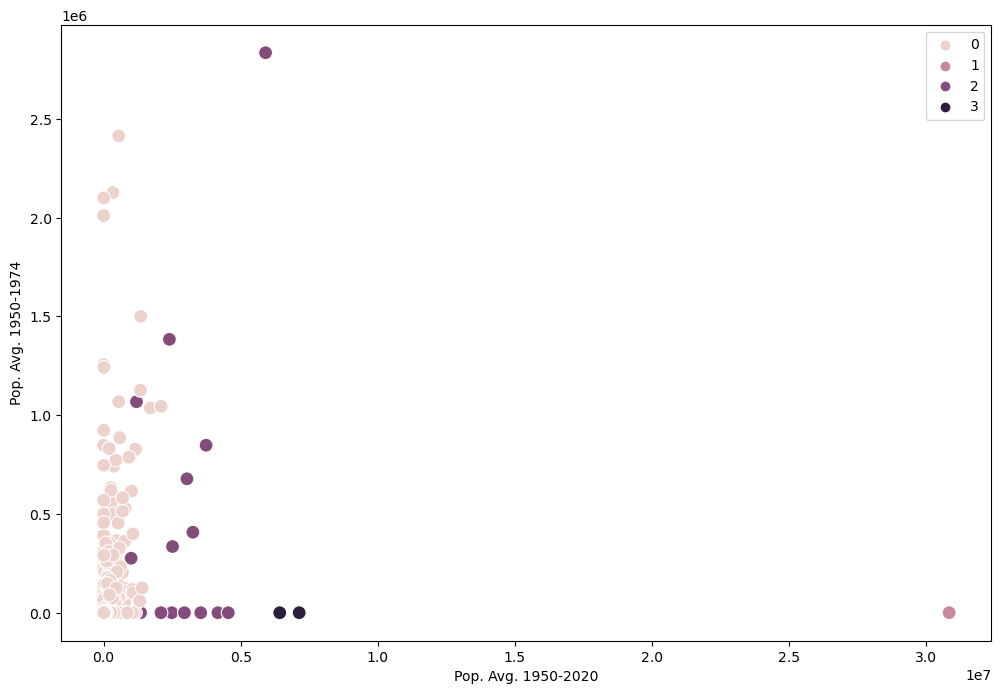

In [18]:
# Plot the clusters for the average of all years and average of 1950-1974 variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['avg_all_yrs'], y=df['avg_1950_to_1974'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Pop. Avg. 1950-2020') 
plt.ylabel('Pop. Avg. 1950-1974') 
plt.show()

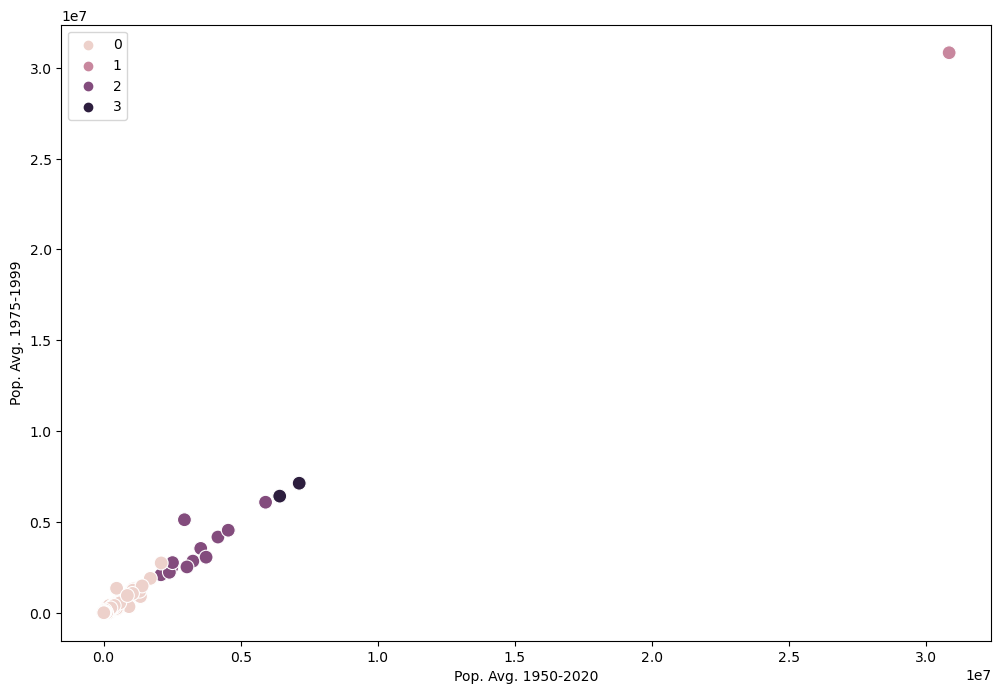

In [19]:
# Plot the clusters for the average of all years and average of 1975 to 1999 variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['avg_all_yrs'], y=df['avg_1975_to_1999'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Pop. Avg. 1950-2020') 
plt.ylabel('Pop. Avg. 1975-1999') 
plt.show()

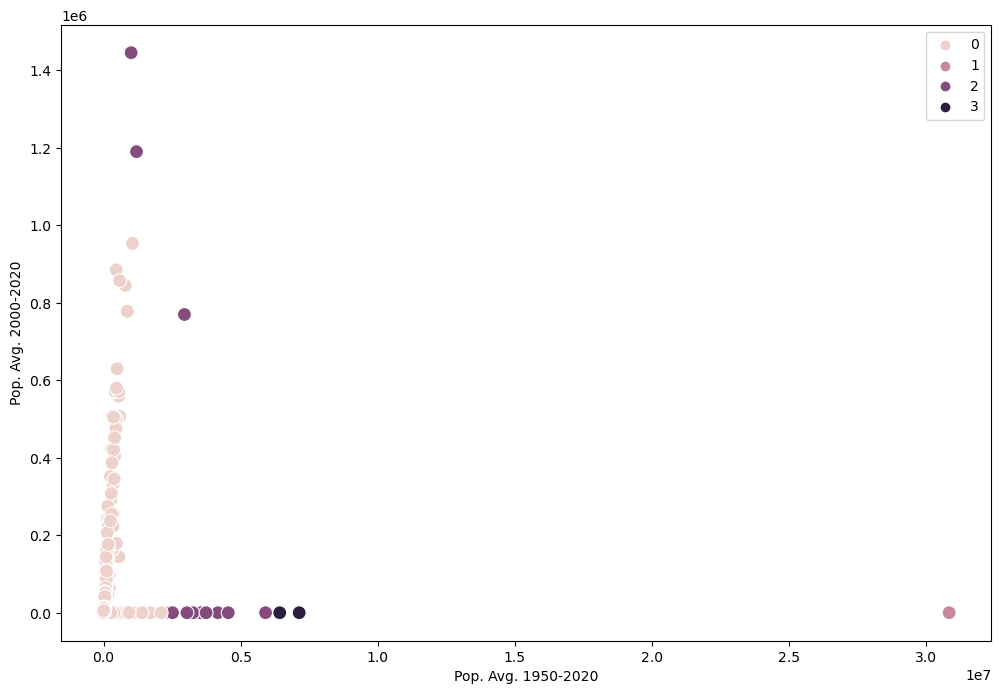

In [20]:
# Plot the clusters for the average of all years and average of 1975 to 1999 variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['avg_all_yrs'], y=df['avg_2000_to_2020'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Pop. Avg. 1950-2020') 
plt.ylabel('Pop. Avg. 2000-2020') 
plt.show()

#### These clusters don't make sense; however, I knew this going into the analysis.  This dataset only has one quantitative variable over time, so this clustering doesn't work for my data.  However, I went through the exercise to show that I understand know how to use this method.

In [24]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [25]:
df.groupby('cluster').agg({'avg_1950_to_1974':['mean', 'median'], 
                         'avg_1975_to_1999':['mean', 'median'], 
                         'avg_2000_to_2020':['mean', 'median'],
                          'avg_all_yrs':['mean', 'median']})

avg_1950_to_1974           avg_1975_to_1999              \
                        mean    median             mean      median   
cluster                                                               
dark purple         0.000000       0.0     6.775000e+06   6775000.0   
light pink       4260.646667       0.0     6.687377e+03         8.0   
pink              110.000000     110.0     3.083200e+07  30832000.0   
purple         489485.187500  137962.0     2.959787e+06   2640500.0   

            avg_2000_to_2020          avg_all_yrs              
                        mean median          mean      median  
cluster                                                        
dark purple         0.000000    0.0  6.775000e+06   6775000.0  
light pink       3106.666744    7.0  6.791820e+03        26.0  
pink                0.000000    0.0  3.083200e+07  30832000.0  
purple         212839.937500    0.0  2.909632e+06   2727458.0

#### These results aren't necessarily useful for my analysis.  I have one incredibly large cluster and 3 small ones, which suggest there really ins't a way to cluster this data.  And that makes sense, because I really only have one quantitative variable and was using averages to complete the assignment.